<a href="https://colab.research.google.com/github/Sundeepan-Sen/rate-of-return-calculator/blob/main/Calculating_the_Risk_of_a_Cryptocurrency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
# Any yahoo finance symbol will work here. 

symbols = ["ETH-USD",
           "BTC-USD",
           "DOGE-USD",
           "XRP-USD"]

TRADING_DAYS = 365.25

data = pd.DataFrame()

for symbol in symbols:
    data[symbols] = wb.DataReader(symbols, data_source='yahoo')['Adj Close']

In [3]:
print(data.tail())

                ETH-USD       BTC-USD  DOGE-USD   XRP-USD
Date                                                     
2021-04-28  2756.876953  53555.109375  0.305169  1.399360
2021-04-29  2773.207031  57750.175781  0.337561  1.591674
2021-04-30  2945.892822  57828.050781  0.392987  1.651025
2021-05-01  2952.056152  56631.078125  0.376046  1.562641
2021-05-04  3386.176758  56577.058594  0.437198  1.514089


In [4]:
returns = np.log(data / data.shift(1))

In [5]:
print(returns)

             ETH-USD   BTC-USD  DOGE-USD   XRP-USD
Date                                              
2016-05-04       NaN       NaN       NaN       NaN
2016-05-05 -0.050025  0.025623  0.017938  0.032722
2016-05-06  0.002551 -0.002324 -0.008929  0.014121
2016-05-07  0.011926  0.000026 -0.004494 -0.013340
2016-05-08 -0.019723  0.004211  0.008969 -0.000781
...              ...       ...       ...       ...
2021-04-28  0.003815 -0.023430 -0.058896  0.029559
2021-04-29  0.005906  0.075415  0.100881  0.128771
2021-04-30  0.060408  0.001348  0.152030  0.036610
2021-05-01  0.002090 -0.020916 -0.044065 -0.055019
2021-05-04  0.137200 -0.000954  0.150675 -0.031563

[1821 rows x 4 columns]


In [6]:
returns.describe()

,ETH-USD,BTC-USD,DOGE-USD,XRP-USD
count,1820.000000,1820.000000,1820.000000,1820.000000
mean,0.003210,0.002659,0.004170,0.003022
std,0.056554,0.040776,0.077914,0.073054
min,-0.550732,-0.464730,-0.515118,-0.616273
25%,-0.020470,-0.012690,-0.020776,-0.020651
50%,0.000972,0.002345,0.000000,-0.002076
75%,0.027435,0.019033,0.019278,0.019628
max,0.290145,0.225119,1.323469,1.027356


## Mean return of all Symbols

ETH-USD     0.003210
BTC-USD     0.002659
DOGE-USD    0.004170
XRP-USD     0.003022
dtype: float64


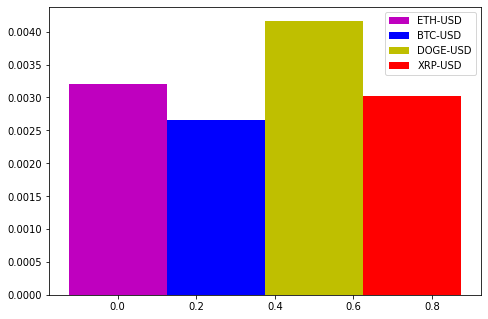

In [7]:
data = returns[symbols].mean()
X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'm', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'y', width = 0.25)
ax.bar(X + 0.75, data[3], color = 'r', width = 0.25)
ax.legend(labels=symbols)

print(returns[symbols].mean())

ETH-USD     1.172496
BTC-USD     0.971047
DOGE-USD    1.523209
XRP-USD     1.103607
dtype: float64

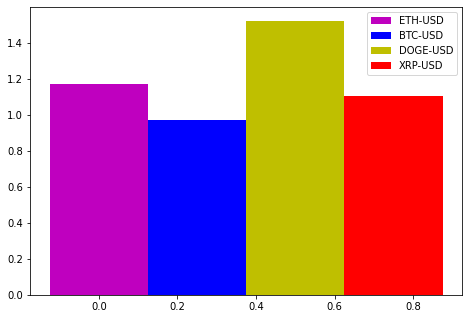

In [8]:
data = returns[symbols].mean() * TRADING_DAYS
X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'm', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'y', width = 0.25)
ax.bar(X + 0.75, data[3], color = 'r', width = 0.25)
ax.legend(labels=symbols)
returns[symbols].mean() * TRADING_DAYS

###Daily risk:

ETH-USD     0.056554
BTC-USD     0.040776
DOGE-USD    0.077914
XRP-USD     0.073054
dtype: float64

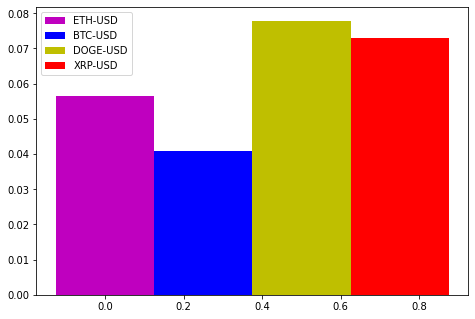

In [9]:
data = returns[symbols].std()
X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])

ax.bar(X + 0.00, data[0], color = 'm', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'y', width = 0.25)
ax.bar(X + 0.75, data[3], color = 'r', width = 0.25)
ax.legend(labels=symbols)
returns[symbols].std()

### Annual risk:

ETH-USD     1.080841
BTC-USD     0.779290
DOGE-USD    1.489062
XRP-USD     1.396173
dtype: float64

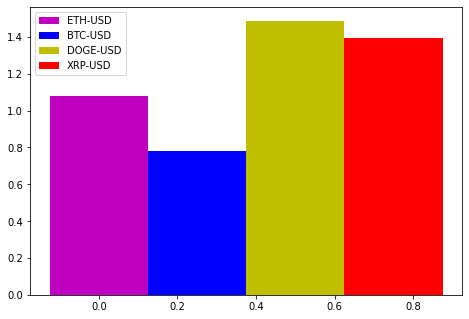

In [10]:
data = returns[symbols].std() * TRADING_DAYS ** 0.5
X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'm', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'y', width = 0.25)
ax.bar(X + 0.75, data[3], color = 'r', width = 0.25)
ax.legend(labels=symbols)
returns[symbols].std() * TRADING_DAYS ** 0.5

Final Results:

ETH-USD     1.172496
BTC-USD     0.971047
DOGE-USD    1.523209
XRP-USD     1.103607
dtype: float64


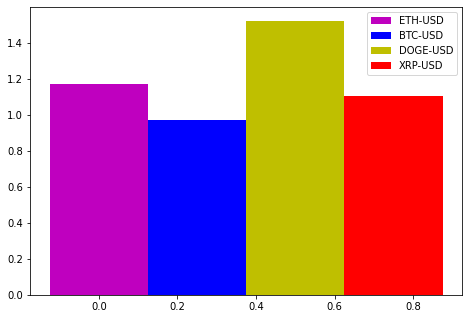

In [11]:
print (returns[symbols].mean() * TRADING_DAYS)
data = returns[symbols].mean() * TRADING_DAYS
X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'm', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'y', width = 0.25)
ax.bar(X + 0.75, data[3], color = 'r', width = 0.25)
ax.legend(labels=symbols)


In [12]:
volatility = returns[symbols].std() * TRADING_DAYS ** 0.5
print(volatility)

ETH-USD     1.080841
BTC-USD     0.779290
DOGE-USD    1.489062
XRP-USD     1.396173
dtype: float64


In [13]:
plt.show(symbols, volatility)

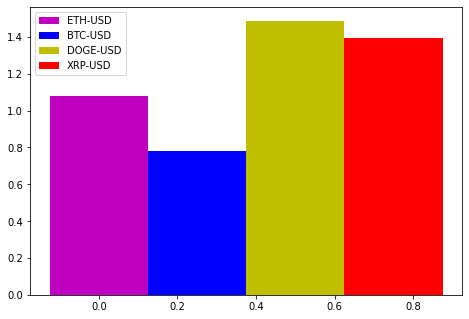

In [14]:
data = volatility
X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'm', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'y', width = 0.25)
ax.bar(X + 0.75, data[3], color = 'r', width = 0.25)
ax.legend(labels=symbols)

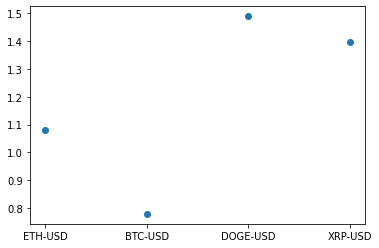

In [16]:
plt.scatter(symbols, volatility)